In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("medical_examination.csv")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df['cholesterol'].replace([1,[2,3]],[0,1],inplace=True)
df['gluc'].replace([1,[2,3]],[0,1],inplace=True)

In [4]:
df['overweight'] = (df['weight'])/((df['height']/100)**2)

for i in range(len(df['overweight'])):
    if (df['overweight'][i]>25):
        df['overweight'][i] = 1
    else:
        df['overweight'][i] = 0

C:\Users\davis\AppData\Local\Temp/ipykernel_10328/1364710165.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overweight'][i] = 0
C:\Users\davis\AppData\Local\Temp/ipykernel_10328/1364710165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overweight'][i] = 1


In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


In [17]:
df_cat = pd.melt(df,value_vars=['cholesterol','gluc','smoke','alco','active','overweight'],id_vars=['cardio'])
df_cat

,cardio,variable,value
0,0,cholesterol,0.0
1,1,cholesterol,1.0
2,1,cholesterol,1.0
3,1,cholesterol,0.0
4,0,cholesterol,0.0
...,...,...,...
419995,0,overweight,1.0
419996,1,overweight,1.0
419997,1,overweight,1.0
419998,1,overweight,1.0


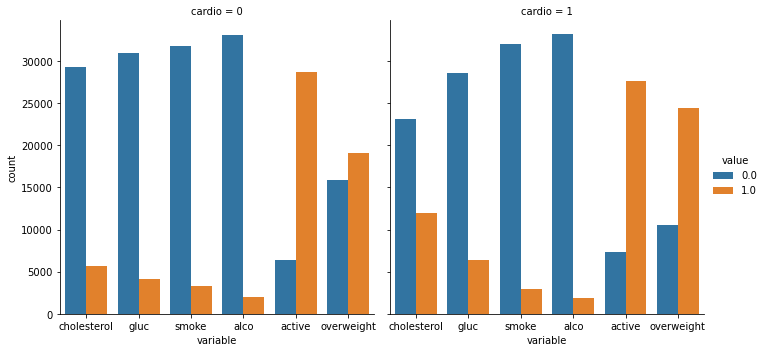

In [41]:
g = sns.catplot(data = df_cat, kind='count',x = 'variable',hue='value',col='cardio')

In [50]:
df_heat = df[(df['ap_lo']<=df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) &
(df['weight'] >= df['weight'].quantile(0.025))& (df['weight'] <= df['weight'].quantile(0.975))]

In [54]:
corr = df_heat.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


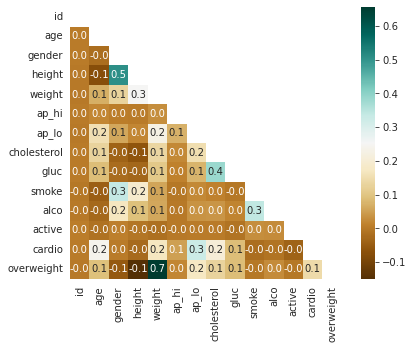

In [78]:
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(7, 5))

    ax = sns.heatmap(corr, mask=mask, square=True,annot=True,fmt=".1f",cmap='BrBG')

